<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling/blob/main/Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive Connection and Packages Importation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/drive


# **Linear Regression, 선형 회귀**

*   Regression: Input data x를 Output data y로 mapping하는 모델 y=f(x)를 찾는것.
*   Linear Regression: 모델 f(x)가 linear model, 즉 f(x)=wx+b

### **Closed Form Linear Regression**

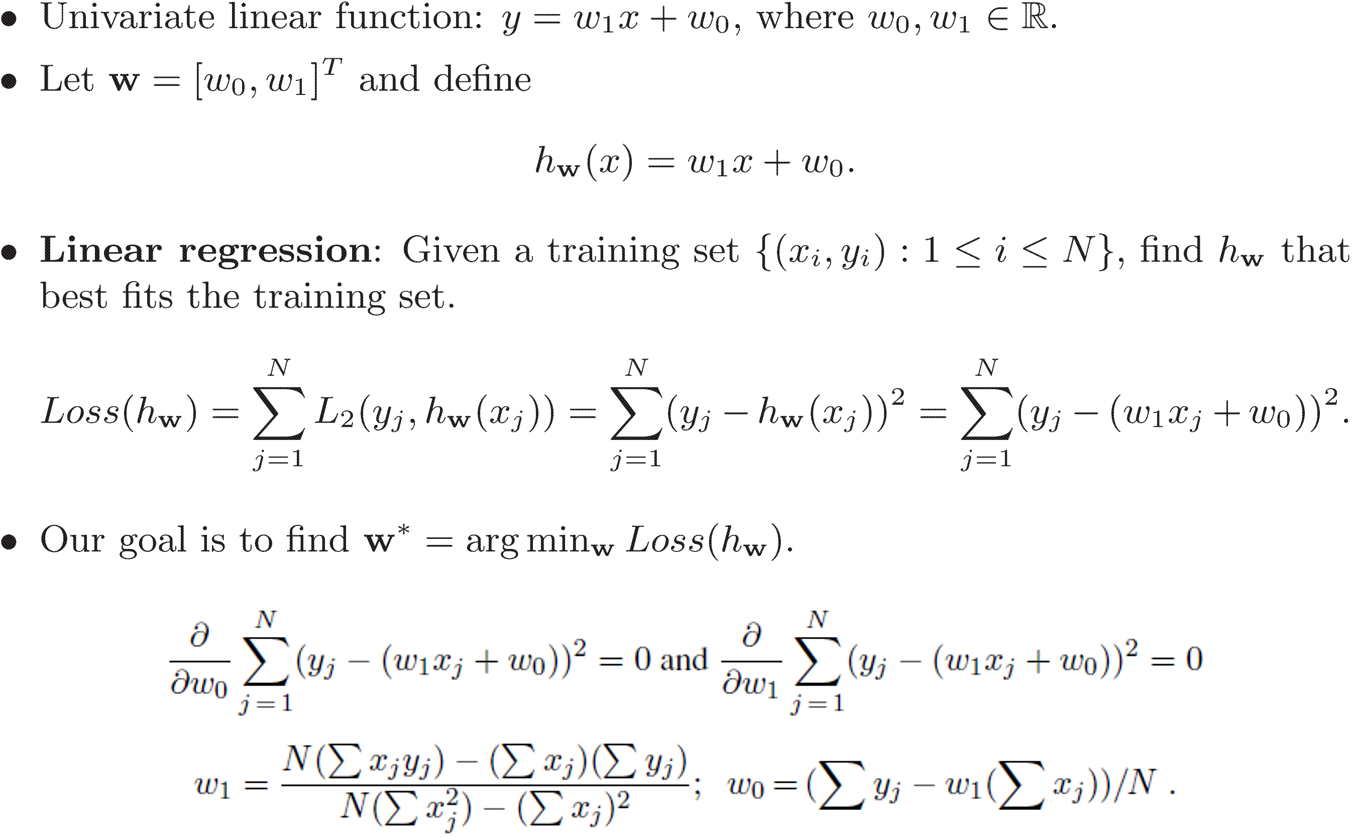

shape of input data :  (100,)
shape of output data :  (100,)



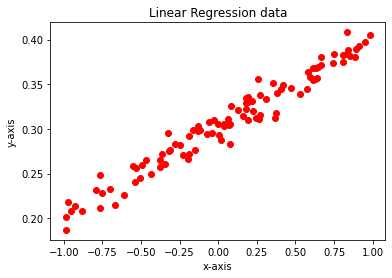

a = w1 = weight : 0.09899378873058774
b = wo = bias : 0.3020929764555586



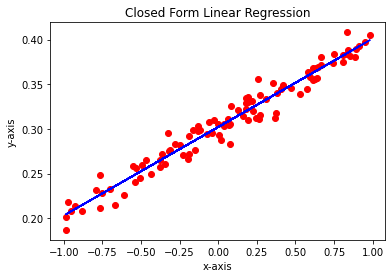

In [ ]:
# Data Preparation
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()             # close the file

x_data = []
y_data = []

# Convert String to Float data
for s in text:
    data = s.split()    # 가운데 공백으로 split
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))

# Convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)
print("shape of input data : ", x_data.shape)
print("shape of output data : ", y_data.shape)
print()

# Plot Original Input/Output data set
plt.figure(1)
plt.plot(x_data, y_data, 'ro')    # plot data
plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Linear Regression data')
plt.show()


# Closed Form Linear Regression -> 수식 이용
N = len(x_data)     # the size of data

sum_of_x = np.sum(x_data)
sum_of_x_square = np.sum(x_data * x_data)
sum_of_y = np.sum(y_data)
sum_of_xy = np.sum(x_data * y_data)

a = (N * sum_of_xy - sum_of_x * sum_of_y ) / (N * sum_of_x_square - sum_of_x ** 2)    # a = w1 = weight
b = (sum_of_y - a * sum_of_x) / N                                                     # b = w0 = bias

print(f'a = w1 = weight : {a}')
print(f'b = wo = bias : {b}')
print()


# Plot Original and Predicted Input/Output data set
y_regression = a * x_data + b

plt.figure(2)
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_regression, 'b')
plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Closed Form Linear Regression')
plt.show()

### **Gradient Descent Linear Regression with PyTorch**

만약 Closed-form solution이 없는 경우, 혹은 데이터가 너무 많거나 계산이 매우 복잡하여 정답을 구하기 힘든 경우  
  
  
**"경사하강법(Gradient Descent)" 이용**

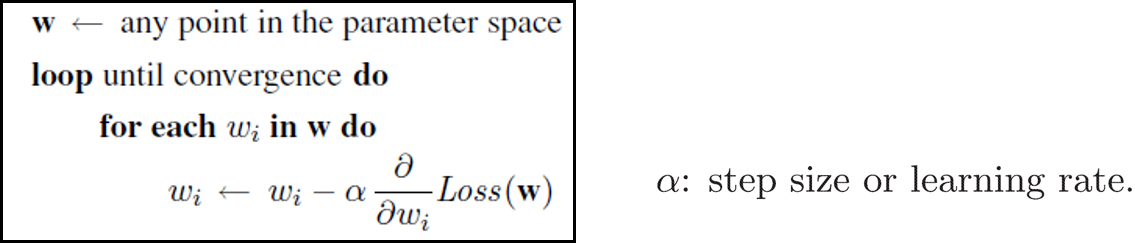

PyTorch Package를 이용하여 직접 미분할 필요 없이
Loss 정의, Gradient 계산, Weight update까지 가능

shape of input data :  (100,)
shape of output data :  (100,)



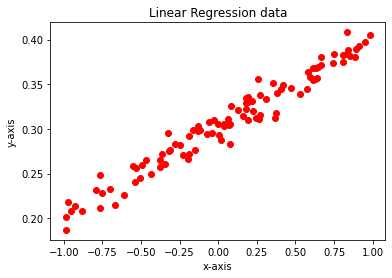


Before data set Increasement of Dimension = (100,) (100,)
After data set Increasement of Dimension = (100, 1) (100, 1)

Epoch [5/100], Loss: 0.1281
Epoch [10/100], Loss: 0.0710
Epoch [15/100], Loss: 0.0401
Epoch [20/100], Loss: 0.0227
Epoch [25/100], Loss: 0.0129
Epoch [30/100], Loss: 0.0074
Epoch [35/100], Loss: 0.0042
Epoch [40/100], Loss: 0.0024
Epoch [45/100], Loss: 0.0014
Epoch [50/100], Loss: 0.0009
Epoch [55/100], Loss: 0.0005
Epoch [60/100], Loss: 0.0004
Epoch [65/100], Loss: 0.0003
Epoch [70/100], Loss: 0.0002
Epoch [75/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0001
Epoch [85/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [95/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001


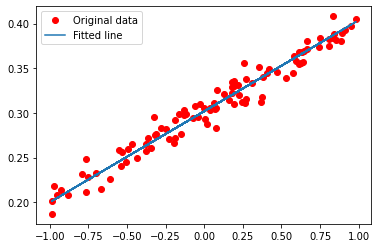

In [ ]:
# Data Preparation
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()             # close the file

x_data = []
y_data = []

# Convert String to Float data
for s in text:
    data = s.split()    # 가운데 공백으로 split
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))

# Convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)
print("shape of input data : ", x_data.shape)
print("shape of output data : ", y_data.shape)
print()

# Plot Original Input/Output data set
plt.figure(1)
plt.plot(x_data, y_data, 'ro')    # plot data
plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Linear Regression data')
plt.show()
print()

# Define Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1

# Linear Regression model(y = Wx+b)
model = nn.Linear(input_size, output_size)

# Loss and Optimizer(SGD)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print('Before data set Increasement of Dimension =', x_data.shape, y_data.shape)   # 차원 증가 전 In/Out Data shape
if len(x_data.shape) == 1 and len(y_data.shape) == 1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print('After data set Increasement of Dimension =', x_data.shape, y_data.shape)   # 차원 증가 후 In/Out Data shape
print()

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_data)
    targets = torch.from_numpy(y_data)

    # Predict outputs with the linear model.
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # compute gradients and update
    optimizer.zero_grad()     # 미분값 초기화
    loss.backward()           # 미분 진행
    optimizer.step()          # weight / bias update 진행
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


# Plot Original and Predicted Input/Output data set
predicted = model(torch.from_numpy(x_data)).detach().numpy()    # detach() = tensor가 저장하고 있던 미분값 등 삭제 & numpy화 진행

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, predicted, label='Fitted line')
plt.legend()
plt.show()

## **Linear Regression with K-Fold Cross Validation**
- Data set의 size가 1/10이 되어 작아졌을때도 gradient descent를 이용한 linear regression이 잘 동작하는지 k-fold cross validation(k=5)을 활용하여 확인  

- Data set의 size가 원래 사이즈였을 때도 동일하게 k-fold cross validation(k=5)를 진행해서 두 경우의 validation loss(k개의 round의 평균 test loss) 비교

*① Data set Size가 원본의 1/10 크기일 때*

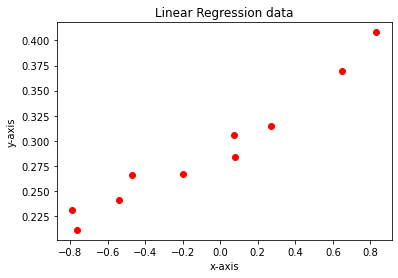

(10, 1) (10, 1)

Epoch [20/100], Loss : 0.0093
Epoch [40/100], Loss : 0.0007
Epoch [60/100], Loss : 0.0002
Epoch [80/100], Loss : 0.0002
Epoch [100/100], Loss : 0.0002
1st round validation error = 8.735820301808417e-05 

Epoch [20/100], Loss : 0.0066
Epoch [40/100], Loss : 0.0010
Epoch [60/100], Loss : 0.0003
Epoch [80/100], Loss : 0.0002
Epoch [100/100], Loss : 0.0002
2nd round validation error = 4.692811614859238e-07 

Epoch [20/100], Loss : 0.0004
Epoch [40/100], Loss : 0.0002
Epoch [60/100], Loss : 0.0001
Epoch [80/100], Loss : 0.0001
Epoch [100/100], Loss : 0.0001
3rd round validation error = 0.0004259147681295872 

Epoch [20/100], Loss : 0.0016
Epoch [40/100], Loss : 0.0003
Epoch [60/100], Loss : 0.0002
Epoch [80/100], Loss : 0.0002
Epoch [100/100], Loss : 0.0002
4th round validation error = 0.0003366186865605414 

Epoch [20/100], Loss : 0.0152
Epoch [40/100], Loss : 0.0025
Epoch [60/100], Loss : 0.0005
Epoch [80/100], Loss : 0.0002
Epoch [100/100], Loss : 0.0001
5th round valida

In [ ]:
# Data Preparation
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()             # close the file

x_data = []
y_data = []

# Convert String to Float data for 10 iterations
for idx, s in enumerate(text):
    if idx%10==0:
      data = s.split()
      x_data.append(float(data[0]))
      y_data.append(float(data[1]))    

# Convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

# Plot the fragmented input data
plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data
plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Linear Regression data')
plt.show()



## Gradient Descent Linear Regression with K-Fold Cross Validation(k=5)
# Input, Output Data Shaping
if len(x_data.shape) == 1 and len(y_data.shape) == 1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)
print()

# Define Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
K = 5
n_over_k = int(len(x_data) / K)   # n(input data의 갯수)/k => 부분집합 1개당 data 갯수

val_losses = []       # array for saving validation losses

for k in range(K):
  # ① Linear Regression Model : y = wx + b
  model = nn.Linear(input_size, output_size)

  # ② Loss Function(MSE Loss) and Optimization(SGD)
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # ③ Training / Validation Partitioning with k-th round
  # np.delete() 함수에 slice를 넘겨주면 해당 axis의 해당 index들을 array에서 제거 -> slice된 data들 = 몇번째 부분집합인가?
  x_train = np.delete(x_data, slice(k*n_over_k, (k+1)*n_over_k), axis=0)    # slice(start, end, axis) = axis기준 start ~ (end-1)까지 선택
  y_train = np.delete(y_data, slice(k*n_over_k, (k+1)*n_over_k), axis=0)

  # 앞 뒤로 slice 한것을 첫 번째 axis를 기준으로 붙여도 됨(concatenate 함수)
  # x_train = np.concatenate((x_data[:k*n_over_k,:], x_data[(k+1)*n_over_k:,:]), axis=0) 
  # y_train = np.concatenate((y_data[:k*n_over_k,:], y_data[(k+1)*n_over_k:,:]), axis=0) 

  x_valid = x_data[k*n_over_k:(k+1)*n_over_k, :]    # valid input data set
  y_valid = y_data[k*n_over_k:(k+1)*n_over_k, :]    # valid output data set

  # ④ Train the Model
  for epoch in range(num_epochs):
    # numpy array를 torch tensor로 변환
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # linear model을 이용한 output 예측
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # gradient 계산 및 update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(epoch + 1) % 20 == 0:
      print("Epoch [{}/{}], Loss : {:.4f}".format(epoch + 1, num_epochs, loss.item()))

  # ⑤ Validation Error
  inputs = torch.from_numpy(x_valid)
  targets = torch.from_numpy(y_valid)
  outputs = model(inputs)

  loss = criterion(outputs, targets)

  if k == 0:
    print(f"{k+1}st round validation error =", loss.item(), "\n")
  elif k == 1:
    print(f"{k+1}nd round validation error =", loss.item(), "\n")
  elif k == 2:
    print(f"{k+1}rd round validation error =", loss.item(), "\n")
  else:
    print(f"{k+1}th round validation error =", loss.item(), "\n")

  val_losses.append(loss.item())

val_losses = np.asarray(val_losses)
print("\nFinal Validation Error : ", val_losses.mean())

*② Data set Size가 원본 크기일 때*

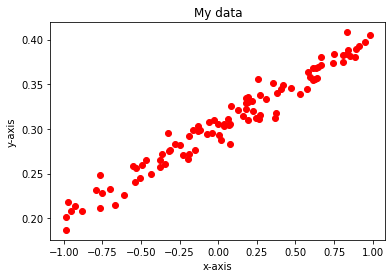

(100, 1) (100, 1)

Epoch [20/100], Loss : 0.0084
Epoch [40/100], Loss : 0.0011
Epoch [60/100], Loss : 0.0002
Epoch [80/100], Loss : 0.0001
Epoch [100/100], Loss : 0.0001
1st round validation error = 0.00020663256873376667 

Epoch [20/100], Loss : 0.0042
Epoch [40/100], Loss : 0.0006
Epoch [60/100], Loss : 0.0002
Epoch [80/100], Loss : 0.0001
Epoch [100/100], Loss : 0.0001
2nd round validation error = 3.115008075837977e-05 

Epoch [20/100], Loss : 0.0179
Epoch [40/100], Loss : 0.0016
Epoch [60/100], Loss : 0.0002
Epoch [80/100], Loss : 0.0001
Epoch [100/100], Loss : 0.0001
3rd round validation error = 0.00016618685913272202 

Epoch [20/100], Loss : 0.0320
Epoch [40/100], Loss : 0.0040
Epoch [60/100], Loss : 0.0006
Epoch [80/100], Loss : 0.0002
Epoch [100/100], Loss : 0.0001
4th round validation error = 0.00011039128003176302 

Epoch [20/100], Loss : 0.0209
Epoch [40/100], Loss : 0.0019
Epoch [60/100], Loss : 0.0003
Epoch [80/100], Loss : 0.0001
Epoch [100/100], Loss : 0.0001
5th round v

In [ ]:
# Data Preparation
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()             # close the file

x_data = []
y_data = []

# Convert String to Float data
for s in text:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))    

# Convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

# Plot the fragmented input data
plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data
plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')
plt.show()



## Gradient Descent Linear Regression with K-Fold Cross Validation(k=5)
# Input, Output Data Shaping
if len(x_data.shape) == 1 and len(y_data.shape) == 1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)
print()

# Define Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
K = 5
n_over_k = int(len(x_data) / K)   # n(input data의 갯수)/k => 부분집합 1개당 data 갯수

val_losses = []       # array for saving validation losses

for k in range(K):
  # ① Linear Regression Model : y = wx + b
  model = nn.Linear(input_size, output_size)

  # ② Loss Function(MSE Loss) and Optimization(SGD)
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # ③ Training / Validation Partitioning with k-th round
  # np.delete() 함수에 slice를 넘겨주면 해당 axis의 해당 index들을 array에서 제거 -> slice된 data들 = 몇번째 부분집합인가?
  x_train = np.delete(x_data, slice(k*n_over_k, (k+1)*n_over_k), axis=0)    # slice(start, end, axis) = axis기준 start ~ (end-1)까지 선택
  y_train = np.delete(y_data, slice(k*n_over_k, (k+1)*n_over_k), axis=0)

  # 앞 뒤로 slice 한것을 첫 번째 axis를 기준으로 붙여도 됨(concatenate 함수)
  # x_train = np.concatenate((x_data[:k*n_over_k,:], x_data[(k+1)*n_over_k:,:]), axis=0) 
  # y_train = np.concatenate((y_data[:k*n_over_k,:], y_data[(k+1)*n_over_k:,:]), axis=0) 

  x_valid = x_data[k*n_over_k:(k+1)*n_over_k, :]    # valid input data set
  y_valid = y_data[k*n_over_k:(k+1)*n_over_k, :]    # valid output data set

  # ④ Train the Model
  for epoch in range(num_epochs):
    # numpy array를 torch tensor로 변환
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # linear model을 이용한 output 예측
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # gradient 계산 및 update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(epoch + 1) % 20 == 0:
      print("Epoch [{}/{}], Loss : {:.4f}".format(epoch + 1, num_epochs, loss.item()))

  # ⑤ Validation Error
  inputs = torch.from_numpy(x_valid)
  targets = torch.from_numpy(y_valid)
  outputs = model(inputs)

  loss = criterion(outputs, targets)

  if k == 0:
    print(f"{k+1}st round validation error =", loss.item(), "\n")
  elif k == 1:
    print(f"{k+1}nd round validation error =", loss.item(), "\n")
  elif k == 2:
    print(f"{k+1}rd round validation error =", loss.item(), "\n")
  else:
    print(f"{k+1}th round validation error =", loss.item(), "\n")

  val_losses.append(loss.item())

val_losses = np.asarray(val_losses)
print("\nFinal Validation Error : ", val_losses.mean())

# **Logistic Regression, 로지스틱 회귀**

*   Regression: input data $x$를 output data $y$로 매핑하는 모델 $f$를 찾는것.

*   Logistic Regression: 모델 $f$가 linear model의 output을 logistc function을 이용해서 0~1사이의 확률값을 예측함, 즉 $$f(\textbf{x})=\sigma(\textbf{w}^T\textbf{x}+b)=\dfrac{1}{1+e^{-(\textbf{w}^T\textbf{x}+b)}}$$

*   Loss function
$$\text{Loss}(\textbf{w})=-\dfrac{1}{N}\sum y\text{log}(f(\textbf{x}))+(1-y)\text{log}(1-f(\textbf{x})) $$   

*    Gradient Descent
$$\textbf{w}=\textbf{w}-\alpha \dfrac{\partial}{\partial\textbf{w}}\text{Loss}(\textbf{w})$$

#### Compute the Hypothesis, Low-Level Loss Function, Cost Function with package
① Hypothesis function$$f(\textbf{x})=\sigma(\textbf{w}^T\textbf{x}+b)=\dfrac{1}{1+e^{-(\textbf{w}^T\textbf{x}+b)}}$$  

② Low-Level Loss function$$\text{Loss}(\textbf{w})=-\dfrac{1}{N}\sum y\text{log}(f(\textbf{x}))+(1-y)\text{log}(1-f(\textbf{x}))$$  

③ Cost function with `F.binary_cross_entropy`  
실제로 binary classification은 자주 쓰이기 때문에 pytorch에 `F.binary_cross_entropy` 라는 함수가 구현되어 있음

In [ ]:
# Data Preparation
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')
diabetes.head()         # Outcome = 당뇨병인지 아닌지에 대한 여부

train = diabetes[:650]
test = diabetes[650:]
# print(train.groupby('Outcome').size())    # pandas DataFrame의 groupby('column') => 해당 column에 대해 동작을 수행, size() => groupby 처리한 column에 해당하는 value의 출현 횟수


# Train/Test data set Split
x_train = np.asarray(train.drop('Outcome', 1))   # drop() 함수의 2번째 arg => 0이면 row, 1이면 column
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome', 1))
y_test = np.asarray(test['Outcome'])

# Input Feature Normalization
# Gaussian-Distribution : 현재 각 input feature의 scale이 제각각이기 때문에, 이 경우에 성능이 떨어질 수 있으므로 scale을 비슷하게 맞춰준다
means = np.mean(x_train, axis=0)    # numpy mean()의 axis = 0이면 column을 따라 계산한 산술 평균
stds = np.std(x_train, axis=0)      # numpy std()의 axis = 0이면 column을 따라 계산한 표준 편차
x_train = (x_train - means)/stds
x_test = (x_test - means)/stds

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train).unsqueeze(-1)    # unsqueeze = 가장 마지막 차원을 하나 늘려준다 = 벡터/행렬(n X 1)의 형태로 맞춰주는 작업
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test).unsqueeze(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


### **① Without Balancing + Training with `F.binary_cross_entropy` and check Test data set**

In [ ]:
# Model Initialization and Setting Optimizer
W = torch.zeros((8, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=1)

num_epochs = 100
for epoch in range(num_epochs + 1):

  # ① Cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # ② 계산한 Cost를 통한 Hypothesis function update
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # ③ 10번의 epoch마다 로그 출력
  if epoch % 10 == 0:
    print("Epoch {:4d}/{}  Cost = {:.6f}".format(epoch, num_epochs, cost.item()))

Epoch    0/100  Cost = 0.693147
Epoch   10/100  Cost = 0.477473
Epoch   20/100  Cost = 0.468751
Epoch   30/100  Cost = 0.467308
Epoch   40/100  Cost = 0.467003
Epoch   50/100  Cost = 0.466932
Epoch   60/100  Cost = 0.466914
Epoch   70/100  Cost = 0.466910
Epoch   80/100  Cost = 0.466909
Epoch   90/100  Cost = 0.466908
Epoch  100/100  Cost = 0.466908


In [ ]:
# 학습한 weight와 bias 확인
print(W, b)
print()


# Validation process with x_test and y_test
hypothesis = torch.sigmoid(x_test.matmul(W) + b)

prediction = hypothesis >= torch.FloatTensor([0.5])   # True/False를 통한 Binary Classification 작업
correct_prediction = prediction.float() == y_test

accuracy = correct_prediction.sum().item() / len(correct_prediction)
print('The model has an accuracy of {:2.2f}% for the Test set.'.format(accuracy * 100))

tensor([[ 0.4520],
        [ 1.0729],
        [-0.2492],
        [-0.0065],
        [-0.1097],
        [ 0.7790],
        [ 0.3553],
        [ 0.1201]], requires_grad=True) tensor([-0.9190], requires_grad=True)

The model has an accuracy of 78.81% for the Test set.


### **② Balancing Training Data set + Training with `F.binary_cross_entropy` and check Test data set**

In [ ]:
# Train/Test data set Split
x_train = np.asarray(train.drop('Outcome', 1))   # drop() 함수의 2번째 arg => 0이면 row, 1이면 column
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome', 1))
y_test = np.asarray(test['Outcome'])

# Input Feature Normalization
# Gaussian-Distribution : 현재 각 input feature의 scale이 제각각이기 때문에, 이 경우에 성능이 떨어질 수 있으므로 scale을 비슷하게 맞춰준다
means = np.mean(x_train, axis=0)    # numpy mean()의 axis = 0이면 column을 따라 계산한 산술 평균
stds = np.std(x_train, axis=0)      # numpy std()의 axis = 0이면 column을 따라 계산한 표준 편차
x_train = (x_train - means)/stds
x_test = (x_test - means)/stds

x_train_pos = x_train[y_train == 0]     # label = 0 인 training input data
x_train_neg = x_train[y_train == 1]     # label = 1 인 training input data
y_train_pos = y_train[y_train == 0]     # label = 0 인 training output data
y_train_neg = y_train[y_train == 1]     # label = 1 인 training output data
print(x_train_pos.shape, x_train_neg.shape)

# Imbalanced한 data set의 balance를 맞춰주는 작업
# Oversampling : 223개의 negative training data set에서 random 복원 sampling으로 427개로 동일하게 맞춰주는 작업
ids = np.arange(len(x_train_neg))
choices = np.random.choice(ids, len(x_train_pos))   # ids의 갯수 중 len(x_train_pos)개 만큼 random 추출한다
x_train_neg = x_train_neg[choices]
y_train_neg = y_train_neg[choices]

x_train = np.concatenate([x_train_pos, x_train_neg], axis=0)
y_train = np.concatenate([y_train_pos, y_train_neg], axis=0)

# 현재 x_train과 y_train 모두 postive 427개 이후 negative 427개가 순차적으로 있는 상태
order = np.arange(len(x_train))
np.random.shuffle(order)          # 순차적으로 존재하던 data들을 무작위로 섞는다
x_train = x_train[order]
y_train = y_train[order]

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train).unsqueeze(-1)    # unsqueeze = 가장 마지막 차원을 하나 늘려준다 = 벡터/행렬(n X 1)의 형태로 맞춰주는 작업
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test).unsqueeze(-1)
print(x_train.shape, y_train.shape)

(427, 8) (223, 8)
torch.Size([854, 8]) torch.Size([854, 1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
# Model Initialization and Setting Optimizer
W = torch.zeros((8, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=1)

num_epochs = 100
for epoch in range(num_epochs + 1):

  # ① Cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # ② 계산한 Cost를 통한 Hypothesis function update
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # ③ 10번의 epoch마다 로그 출력
  if epoch % 10 == 0:
    print("Epoch {:4d}/{}  Cost = {:.6f}".format(epoch, num_epochs, cost.item()))

Epoch    0/100  Cost = 0.693147
Epoch   10/100  Cost = 0.501601
Epoch   20/100  Cost = 0.495981
Epoch   30/100  Cost = 0.495202
Epoch   40/100  Cost = 0.495066
Epoch   50/100  Cost = 0.495039
Epoch   60/100  Cost = 0.495034
Epoch   70/100  Cost = 0.495032
Epoch   80/100  Cost = 0.495032
Epoch   90/100  Cost = 0.495032
Epoch  100/100  Cost = 0.495032


In [ ]:
# 학습한 weight와 bias 확인
print(W, b)
print()


# Validation process with x_test and y_test
hypothesis = torch.sigmoid(x_test.matmul(W) + b)

prediction = hypothesis >= torch.FloatTensor([0.5])   # True/False를 통한 Binary Classification 작업
correct_prediction = prediction.float() == y_test

accuracy = correct_prediction.sum().item() / len(correct_prediction)
print('The model has an accuracy of {:2.2f}% for the Test set.'.format(accuracy * 100))

tensor([[ 0.3292],
        [ 1.1143],
        [-0.0357],
        [-0.0781],
        [-0.0975],
        [ 0.7179],
        [ 0.3922],
        [ 0.1711]], requires_grad=True) tensor([-0.3040], requires_grad=True)

The model has an accuracy of 76.27% for the Test set.
